### Data Exploration
The purpose is to analyze the data, its statistical properties, find patterns, and perform dimensionality reduction techniques to prepare for model fitting.

In [13]:
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import PCA, FactorAnalysis
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
star_folder_dir = "data\\star"
galaxy_folder_dir = "data\\galaxy"
star_images = Path(star_folder_dir).glob("*")
galaxy_images = Path(galaxy_folder_dir).glob("*")
star_list = []    
for image in star_images:
    img = Image.open(image).convert("L")
    star_list.append(np.array(img).reshape(-1))
star_df = pd.DataFrame(star_list)
galaxy_list = []    
for image in galaxy_images:
    img = Image.open(image).convert("L")
    galaxy_list.append(np.array(img).reshape(-1))
galaxy_df = pd.DataFrame(galaxy_list)


In [3]:
star_df["Type"] = 1
print(f"Shape: {star_df.shape}")
star_df.head()

Shape: (3044, 4097)


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,Type
0,127,65,115,89,78,101,88,111,94,123,...,137,74,84,57,76,82,12,103,99,1
1,118,90,79,87,133,104,110,88,105,81,...,103,92,101,93,84,125,112,107,36,1
2,129,104,99,122,66,127,49,58,70,4,...,88,92,71,90,87,119,93,119,56,1
3,55,28,91,81,47,39,79,101,126,60,...,106,106,80,78,69,147,25,128,65,1
4,106,46,103,68,68,69,131,102,64,104,...,68,81,69,66,89,123,99,148,75,1


In [4]:
galaxy_df["Type"] = 0
print(f"Shape: {galaxy_df.shape}")
galaxy_df.head()

Shape: (942, 4097)


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,Type
0,66,105,128,48,92,93,93,108,62,88,...,73,49,77,115,106,43,97,82,58,0
1,172,140,137,202,81,66,106,78,139,78,...,115,100,127,125,147,131,118,106,103,0
2,114,90,159,127,93,105,95,123,92,111,...,91,60,39,84,95,108,95,80,70,0
3,68,19,104,87,125,84,114,25,86,121,...,109,86,95,111,56,150,74,48,79,0
4,43,97,30,69,74,173,109,96,169,91,...,67,122,78,200,130,101,127,86,122,0


In [5]:
#Combine and shuffle dataframes
df = pd.concat([star_df, galaxy_df]).sample(frac=1, ignore_index=True, random_state=101290365)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,Type
0,101,87,138,106,62,119,74,53,119,97,...,111,117,100,82,88,113,123,107,149,1
1,98,83,108,91,123,92,59,120,85,93,...,120,74,93,103,83,80,123,33,81,0
2,100,52,70,54,82,38,81,93,51,66,...,114,74,100,101,78,51,76,117,35,1
3,30,81,71,57,73,16,64,88,84,100,...,83,57,50,38,83,88,70,35,32,0
4,82,88,94,87,126,30,59,111,112,121,...,100,63,84,86,66,113,76,73,63,1


In [6]:
#Convert into X and y matrices/vectors:
X = df.drop("Type", axis=1)
y = pd.DataFrame(df["Type"])
X.shape, y.shape

((3986, 4096), (3986, 1))

In [7]:
print(f"Means: {X.mean()}, {y.mean()}")
print(f"Variance: {X.var()}")
print(f"Covariance: {X.cov()}")

Means: 0       87.649272
1       86.213497
2       87.753638
3       87.127697
4       86.121425
          ...    
4091    87.484947
4092    87.283492
4093    87.284496
4094    87.005770
4095    86.689915
Length: 4096, dtype: float64, Type    0.763673
dtype: float64
Variance: 0        987.897536
1       1035.420656
2        977.366141
3       1010.172648
4       1020.239205
           ...     
4091    1039.375056
4092    1023.340440
4093    1044.321551
4094    1065.341748
4095    1016.480485
Length: 4096, dtype: float64
Covariance:             0            1           2            3            4     \
0     987.897536   215.586316  227.298767   257.423217   203.754517   
1     215.586316  1035.420656  216.314342   222.862567   251.106065   
2     227.298767   216.314342  977.366141   226.267101   228.079859   
3     257.423217   222.862567  226.267101  1010.172648   201.524265   
4     203.754517   251.106065  228.079859   201.524265  1020.239205   
...          ...          ...       

In [8]:
#Standardizing Data:
transformer = MaxAbsScaler()
X = pd.DataFrame(transformer.fit_transform(X))
print(f"Mean: {X.mean()}")
print(f"Covariance: {X.cov()}")

Mean: 0       0.343723
1       0.338092
2       0.344132
3       0.341677
4       0.340401
          ...   
4091    0.343078
4092    0.342288
4093    0.342292
4094    0.341199
4095    0.339960
Length: 4096, dtype: float64
Covariance:           0         1         2         3         4         5         6     \
0     0.015193  0.003315  0.003496  0.003959  0.003158  0.003092  0.003334   
1     0.003315  0.015923  0.003327  0.003427  0.003892  0.003314  0.003160   
2     0.003496  0.003327  0.015031  0.003480  0.003535  0.003870  0.003409   
3     0.003959  0.003427  0.003480  0.015535  0.003124  0.003452  0.003489   
4     0.003158  0.003892  0.003535  0.003124  0.015939  0.003637  0.003457   
...        ...       ...       ...       ...       ...       ...       ...   
4091  0.000775  0.000584  0.001454  0.000891  0.000793  0.000964  0.000908   
4092  0.001044  0.000830  0.001826  0.000867  0.000655  0.001030  0.001302   
4093  0.001037  0.001270  0.001120  0.001049  0.000834  0.001237

<Axes: >

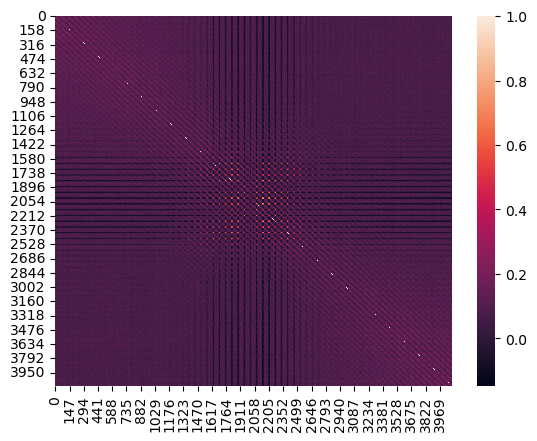

In [14]:
sns.heatmap(X.corr())

High ish correlation in centre variables

In [ ]:
df.columns

### PCA
We will attempt to use PCA for our dimensionality reduction. 

c:\Users\burha\miniconda3\envs\py313\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
c:\Users\burha\miniconda3\envs\py313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Chi-square: inf, P-value: 0.0


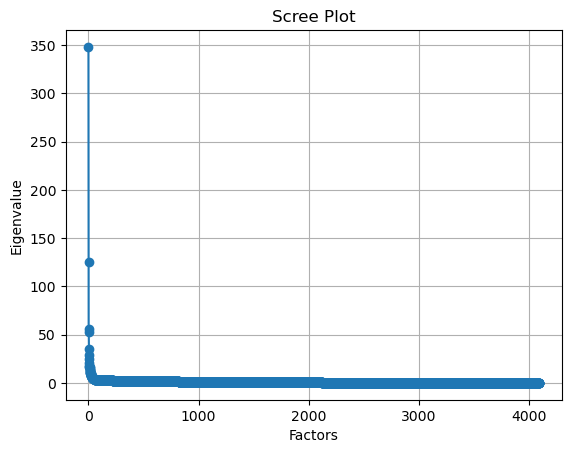

348.2616550005033 0
124.8697647171777 1
56.31297664168699 2
52.4158323776129 3
34.68807772776313 4
29.27848986717091 5
24.669625062445196 6
20.80375568267106 7
17.497674703025922 8
16.90787901598938 9
16.31662744297914 10
15.33544050119181 11
13.680333609262233 12
13.492524864513085 13
13.193610623976449 14
11.646553239349894 15
11.266123253805933 16
10.721303779730537 17
10.093969378336594 18
9.776270312269661 19
9.105110097377722 20
8.575321264750684 21
8.450243251808434 22
8.189081941703595 23
7.792518045560847 24
7.674240850355426 25
7.454929445386479 26
7.36110871106767 27
6.970883912297056 28
6.712581585058125 29
6.600295431410685 30
6.19625611570945 31
6.0216074938095305 32
5.9268791542134105 33
5.744911333654755 34
5.544381486946047 35
5.459688772659431 36
5.390174022589151 37
5.266413822765426 38
4.950298532761603 39
4.920282885387671 40
4.786819500413846 41
4.718641721421526 42
4.619058078532815 43
4.566518919503726 44
4.460043166575687 45
4.307570474178659 46
4.2895112341718

In [30]:
chi_sq, p = calculate_bartlett_sphericity(X.to_numpy())
print(f'Chi-square: {chi_sq}, P-value: {p}')
fa = FactorAnalyzer(rotation="varimax", method="principal")
fa.fit(X.to_numpy())
eigen_values, _ = fa.get_eigenvalues()
plt.plot(eigen_values, marker='o')
plt.title('Scree Plot'); plt.xlabel('Factors'); plt.ylabel('Eigenvalue'); plt.grid(True); plt.show()
for i, val in enumerate(eigen_values):
    print(val, i)

1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479


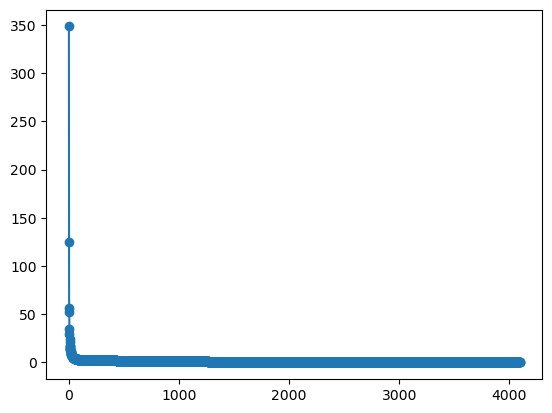

In [48]:
for i, val in enumerate(eigen_values):
    if val < 1:
        print(i)
plt.plot(eigen_values, marker='o')


In [47]:
#we pick p=459 as lambda<2 after
true_FA = FactorAnalysis(n_components=1280)
X_FA = true_FA.fit_transform(X.to_numpy())
X_FA

array([[ 0.07009385,  1.57116005, -1.1133728 , ..., -0.72691815,
         0.65232079, -0.43935072],
       [ 1.08541018,  0.48059084,  1.08714623, ...,  0.21461573,
        -1.65485387,  0.21107021],
       [-0.57623438, -0.24087175, -0.87404109, ..., -0.06899825,
        -1.30156102, -1.30195313],
       ...,
       [-0.31996053, -0.55652763, -1.35375655, ..., -0.64996329,
         0.78217072, -0.67945162],
       [ 1.56402911,  0.18815256,  1.78181674, ...,  0.95920466,
        -0.54261613, -0.75802657],
       [-0.32122213,  2.50667473, -0.07501697, ...,  0.51939589,
         0.0996193 , -0.13458193]], shape=(3986, 1280))

In [ ]:
pca_transform = PCA()
pca_transform.fit(X.to_numpy())
pca_transform.explained_variance_ratio_

array([8.78018088e-02, 5.84905836e-02, 1.32909370e-02, ...,
       3.98705657e-08, 3.52904047e-08, 1.57202345e-33], shape=(3986,))

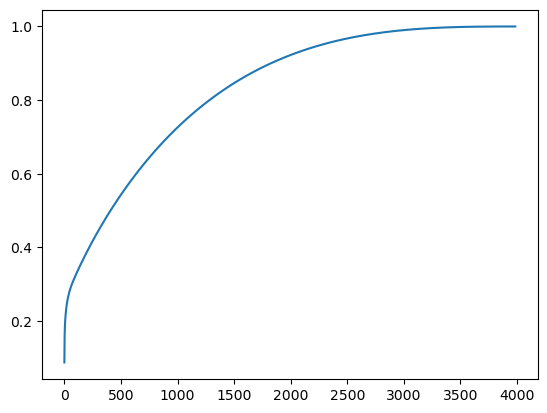

In [37]:
plt.plot(pca_transform.explained_variance_ratio_.cumsum())

In [39]:
for i, val in enumerate(pca_transform.explained_variance_ratio_.cumsum()):
    if 0.91 > val > 0.9:
        print(f"Majority: {i}")
    elif 0.81 > val > 0.8: 
        print(f"Good enough: {i}")
    elif 0.51 > val > 0.5:
        print(f"Halfway: {i}")

Halfway: 407
Halfway: 408
Halfway: 409
Halfway: 410
Halfway: 411
Halfway: 412
Halfway: 413
Halfway: 414
Halfway: 415
Halfway: 416
Halfway: 417
Halfway: 418
Halfway: 419
Halfway: 420
Halfway: 421
Halfway: 422
Halfway: 423
Halfway: 424
Halfway: 425
Halfway: 426
Halfway: 427
Good enough: 1282
Good enough: 1283
Good enough: 1284
Good enough: 1285
Good enough: 1286
Good enough: 1287
Good enough: 1288
Good enough: 1289
Good enough: 1290
Good enough: 1291
Good enough: 1292
Good enough: 1293
Good enough: 1294
Good enough: 1295
Good enough: 1296
Good enough: 1297
Good enough: 1298
Good enough: 1299
Good enough: 1300
Good enough: 1301
Good enough: 1302
Good enough: 1303
Good enough: 1304
Good enough: 1305
Good enough: 1306
Good enough: 1307
Good enough: 1308
Good enough: 1309
Good enough: 1310
Good enough: 1311
Good enough: 1312
Good enough: 1313
Good enough: 1314
Good enough: 1315
Good enough: 1316
Good enough: 1317
Good enough: 1318
Good enough: 1319
Good enough: 1320
Good enough: 1321
Good en

In [40]:
pca_true_transform = PCA(n_components=1282)
X_PCA = pca_true_transform.fit_transform(X.to_numpy())

One more thing we can do is note that the centre has lots of correlation

So we split the data into centre and edge

In [57]:
list_of_centre = []
list_of_outside = []
for i in np.arange(0,4096):
    if np.abs(i // 64 - 32) < 16 and np.abs(i % 64 - 32) < 16:
        list_of_centre.append(i)
    else:
        list_of_outside.append(i)

In [58]:
df_centre = df[list_of_centre]
df_outside = df[list_of_outside]

c:\Users\burha\miniconda3\envs\py313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


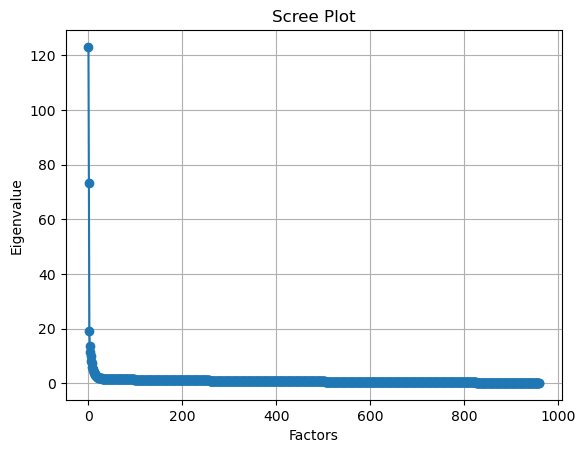

123.02365620955166 0
73.30583758593701 1
19.20998241916137 2
13.415777991158318 3
11.279703796851106 4
9.828857938497194 5
8.247713988076715 6
7.493798107419837 7
5.975329597820217 8
5.129647546126443 9
4.696139942626564 10
3.978647372867269 11
3.753218174759675 12
3.3197866239061775 13
3.2939548260030125 14
2.905788669831177 15
2.8114345315369835 16
2.52684457270868 17
2.3083943423799322 18
2.2518750463855484 19
2.174980210451879 20
2.044627545212673 21
1.9953995638487734 22
1.8930443518082745 23
1.8780813246460377 24
1.8320020519395872 25
1.7864943290489552 26
1.7534261581144672 27
1.729365503801572 28
1.6892141405939558 29
1.6749273346521403 30
1.665887834731077 31
1.6435689950071606 32
1.639455230713796 33
1.625117056882343 34
1.6166245218244084 35
1.6099043370805108 36
1.6001002649525335 37
1.5896142875675636 38
1.5884124223140292 39
1.5823498072965023 40
1.575868302225087 41
1.5683087792147463 42
1.5601858374669149 43
1.5539392269859593 44
1.5507934434046002 45
1.5476433792458242

In [61]:
fa.fit(df_centre.to_numpy())
eigen_values, _ = fa.get_eigenvalues()
plt.plot(eigen_values, marker='o')
plt.title('Scree Plot'); plt.xlabel('Factors'); plt.ylabel('Eigenvalue'); plt.grid(True); plt.show()
for i, val in enumerate(eigen_values):
    print(val, i)

c:\Users\burha\miniconda3\envs\py313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


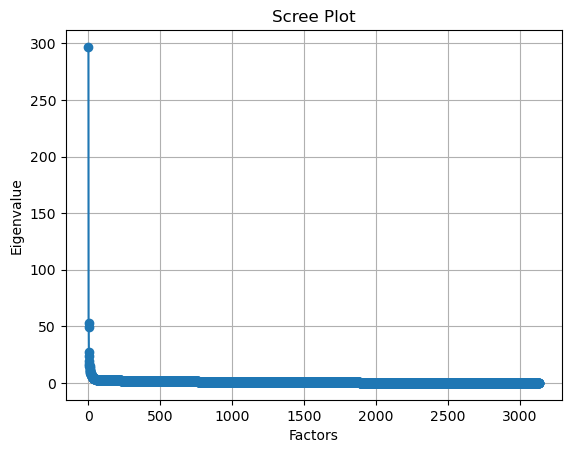

296.7891792937653 0
52.57374716404245 1
49.28500739061044 2
27.491452334644183 3
23.732772356759792 4
19.590752722190885 5
16.98892276281655 6
15.38290623454873 7
14.603626313731377 8
13.281521727832576 9
11.699548326284905 10
11.167029689732676 11
10.620210991838803 12
9.79554516595202 13
9.212577248102964 14
9.049178608988635 15
8.424031297375828 16
8.213646211017373 17
7.795993284698384 18
7.621341958275951 19
7.350431414748151 20
6.794494663552558 21
6.326117034522881 22
6.130492942948519 23
6.013407014250041 24
5.945023224392619 25
5.721721918359757 26
5.297977532446108 27
5.221365364597034 28
4.970232580929698 29
4.773723368361876 30
4.6662288277340505 31
4.607735338264515 32
4.48244383436942 33
4.292715281047002 34
4.189413224212136 35
4.114490784194063 36
3.9182123632197072 37
3.8058013725131254 38
3.745670070143221 39
3.739726533021187 40
3.67503007603475 41
3.571525036161224 42
3.5011011546326616 43
3.4807414229535723 44
3.4650430253244133 45
3.3939958730151414 46
3.367537448

In [62]:
fa.fit(df_outside.to_numpy())
eigen_values, _ = fa.get_eigenvalues()
plt.plot(eigen_values, marker='o')
plt.title('Scree Plot'); plt.xlabel('Factors'); plt.ylabel('Eigenvalue'); plt.grid(True); plt.show()
for i, val in enumerate(eigen_values):
    print(val, i)

An option is to seperate data then have 243 factors for inside and 290 for outside and combine that